In [1]:
# Import Librabries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})


In [2]:
# read dataset using pandas function
Gold_dataset = pd.read_csv("gold_price_data.csv")

In [3]:
# information about the dataset
Gold_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [4]:
# print first 5 rows in the dataframe
Gold_dataset.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [5]:
# print last 5 rows of the dataframe
Gold_dataset.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


Data Description

This is gold price dataset. The dataset gives you information about a gold prices based on serveral other stock prices.

Feature

. Date - mm/dd/yyyy

. SPX - is a free-float weighted measurement stock market index of the 500 largest companies listed on stock exchanges in US

. USO - United States Oil Fund - Not Sure of UOM

. SLV - Silver Price

. EUR/USD - currency pair quotation of the Euro against the US

Label

. GLD - Gold Price

# Exploratory Data Analysis

. Find Missing Values

. Find Features with one value

. Explore the Categorical Features

. Explore the Numerical Features

. Find Discrete Numerical Features

. Relation between Discrete numerical Features and Labels

. Find Continous Numerical Features

. Distribution of Continous Numerical Features

. Relation between Continous numerical Features and Labels

. Find Outliers in numerical features

. Explore the Correlation between numerical features

In [6]:
# Missing Values/Null Values Count
Gold_dataset.isna().sum().sort_values(ascending=False)

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [7]:
#Find Features with one value
for column in Gold_dataset.columns:
    print(column,Gold_dataset[column].nunique())

Date 2290
SPX 2277
GLD 1930
USO 1514
SLV 1331
EUR/USD 2066


--No feature with only one value--

In [8]:
# Explore the Categorical Features
categorical_features=[feature for feature in Gold_dataset.columns if ((Gold_dataset[feature].dtypes == 'O') & (feature not in ['GLD']) ) ]
categorical_features

['Date']

In [9]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(Gold_dataset[feature].unique())))

The feature is Date and number of categories are 2290


In [10]:
# Explore the Numerical Variables
# list of numerical variables
numerical_features = [feature for feature in Gold_dataset.columns if ((Gold_dataset[feature].dtypes != 'O') & (feature not in ['GLD' ]) )]
print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
Gold_dataset[numerical_features].head()

Number of numerical variables:  4


,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.180,1.471692
1,1447.160034,78.370003,15.285,1.474491
2,1411.630005,77.309998,15.167,1.475492
3,1416.180054,75.500000,15.053,1.468299
4,1390.189941,76.059998,15.590,1.557099


In [11]:
# Find Discrete Numerical Features
discrete_feature=[feature for feature in numerical_features if len(Gold_dataset[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 0


In [12]:
# Find Continuous Numerical Features
continuous_features=[feature for feature in numerical_features if feature not in discrete_feature+['GLD']]
print("Continuous feature Count {}".format(len(continuous_features)))

Continuous feature Count 4


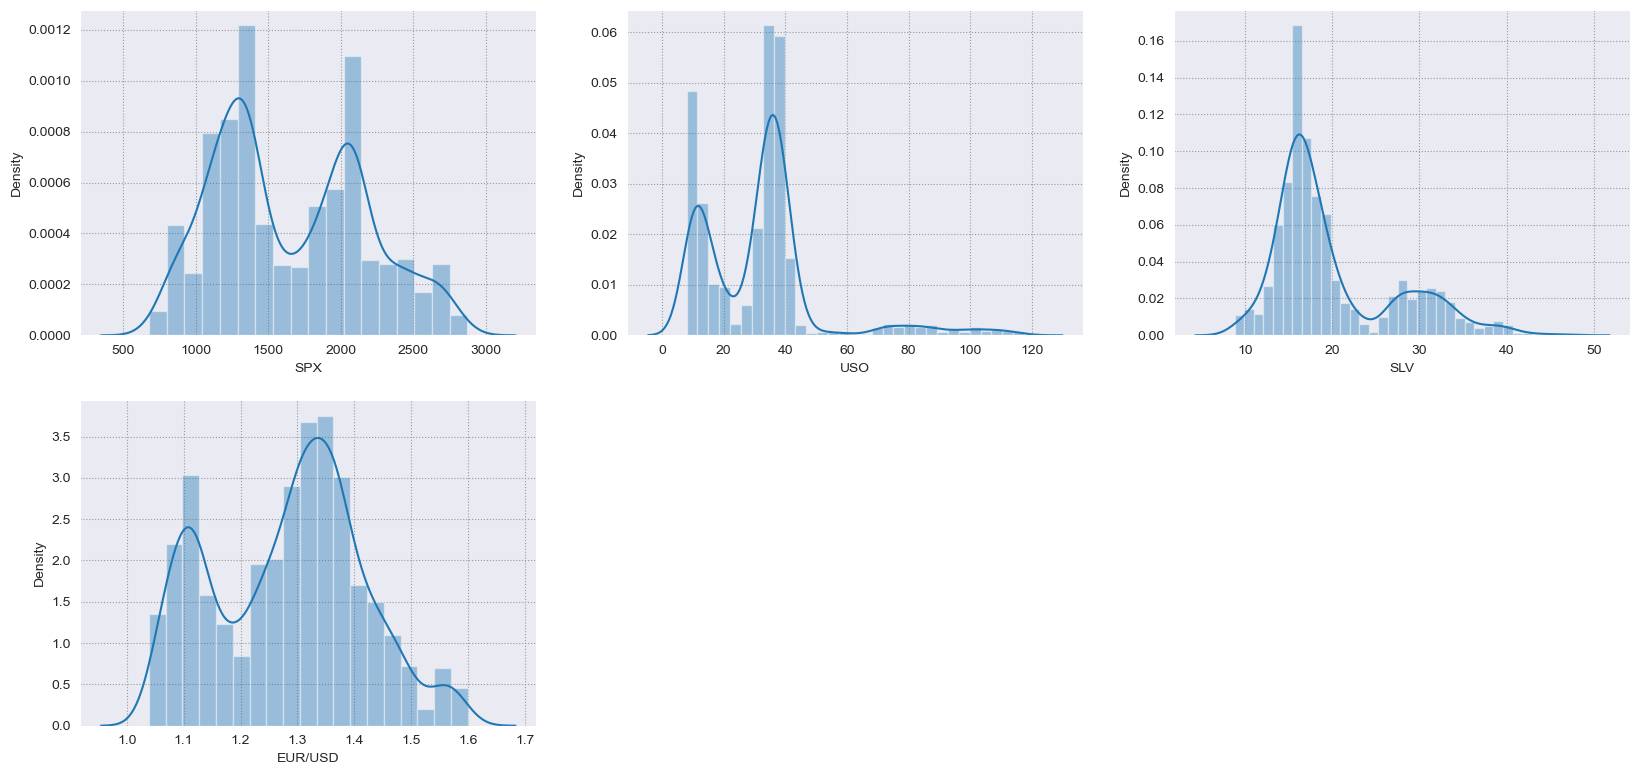

In [13]:
# Distribution of Continuous Numerical Features

#plot a univariate distribution of continues observations
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for continuous_feature in continuous_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.distplot(Gold_dataset[continuous_feature])
    plt.xlabel(continuous_feature)
    plotnumber+=1
plt.show()

--It seems SPX, SLV, and EUR/USD distributed normally

--USO Heavely skewed towards right and seems to be have soome outliers

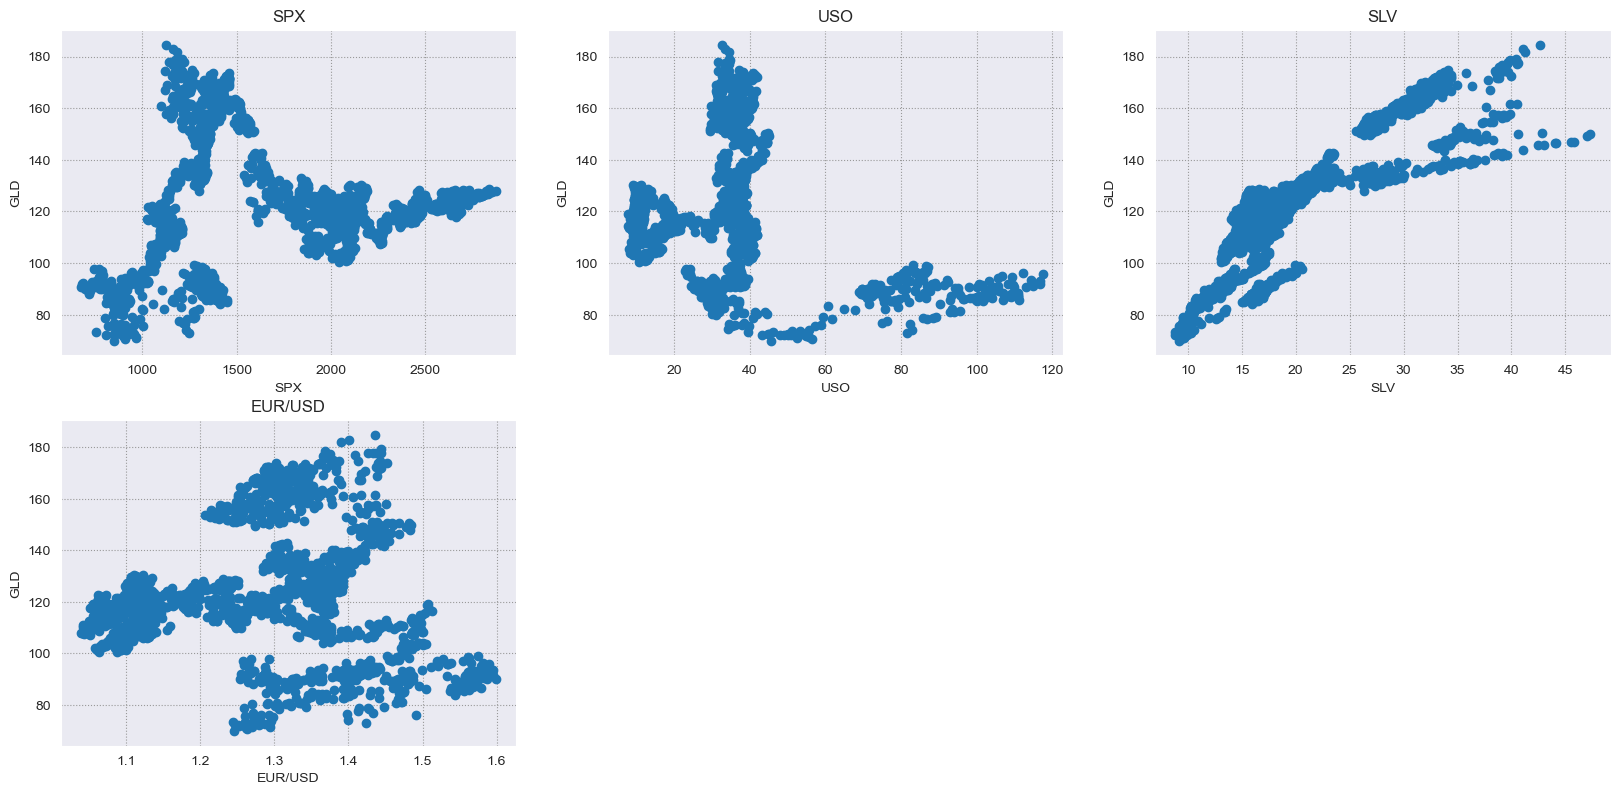

In [14]:
# Relation between Continuous numerical features and Labels
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for feature in continuous_features:
    data=Gold_dataset.copy()
    ax = plt.subplot(12,3, plotnumber)
    plt.scatter(data[feature],data['GLD'])
    plt.xlabel(feature)
    plt.ylabel('GLD')
    plt.title(feature)
    plotnumber+=1
plt.show()

--It seems SLV feature linearly progressing with GLD

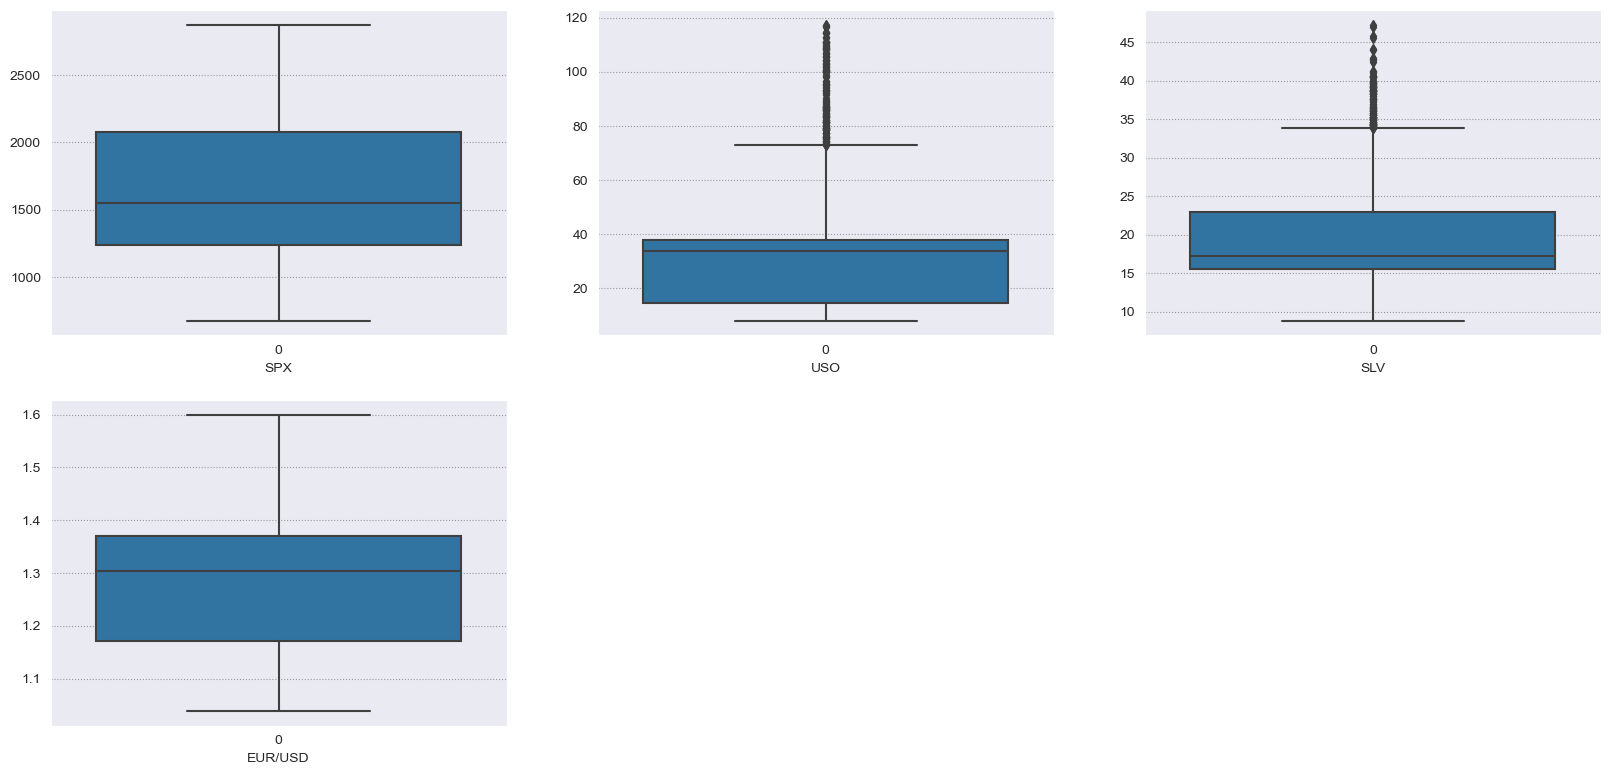

In [15]:
# Find Outliers in numerical features
#boxplot on numerical features to find outliers
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for numerical_feature in numerical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(Gold_dataset[numerical_feature])
    plt.xlabel(numerical_feature)
    plotnumber+=1
plt.show()

--It seems USO and SLV have some outliers which can be removed in feature engineering 

In [16]:
# getting the statistical measures of the data
Gold_dataset.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


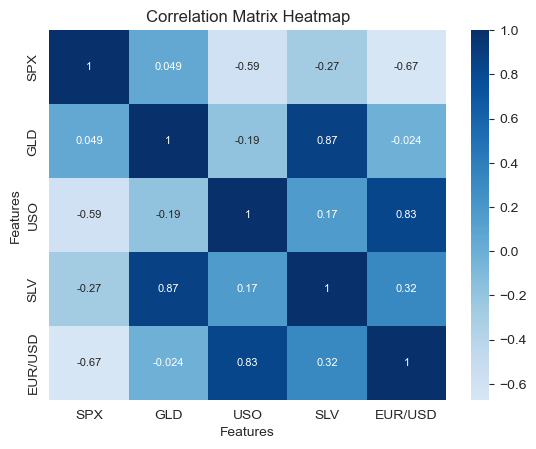

In [17]:
# Explore the Correlation between numerical features
# Calculate correlation matrix
correlation = Gold_dataset.corr()

# Create heatmap
sns.heatmap(correlation, cbar=True, center=0, annot=True, annot_kws={'size':8}, cmap='Blues')

# Set title and axis labels
plt.title('Correlation Matrix Heatmap')
plt.xlabel('Features')
plt.ylabel('Features')

# Show plot
plt.show()

In [18]:
# correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


-- It seems SLV feature is heavily correlated with GLD

<Axes: xlabel='GLD', ylabel='Density'>

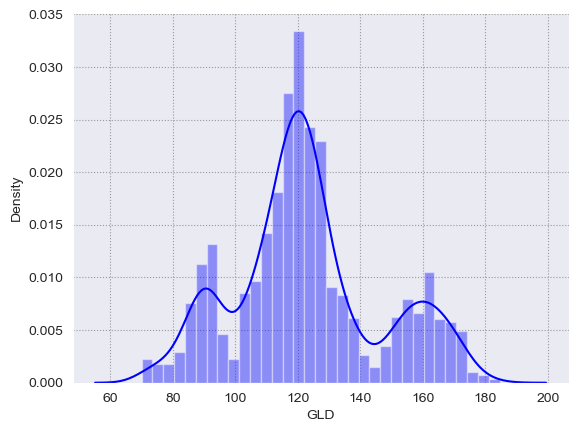

In [19]:
# checking the distribution of the GLD Price
sns.distplot(Gold_dataset['GLD'],color='blue')

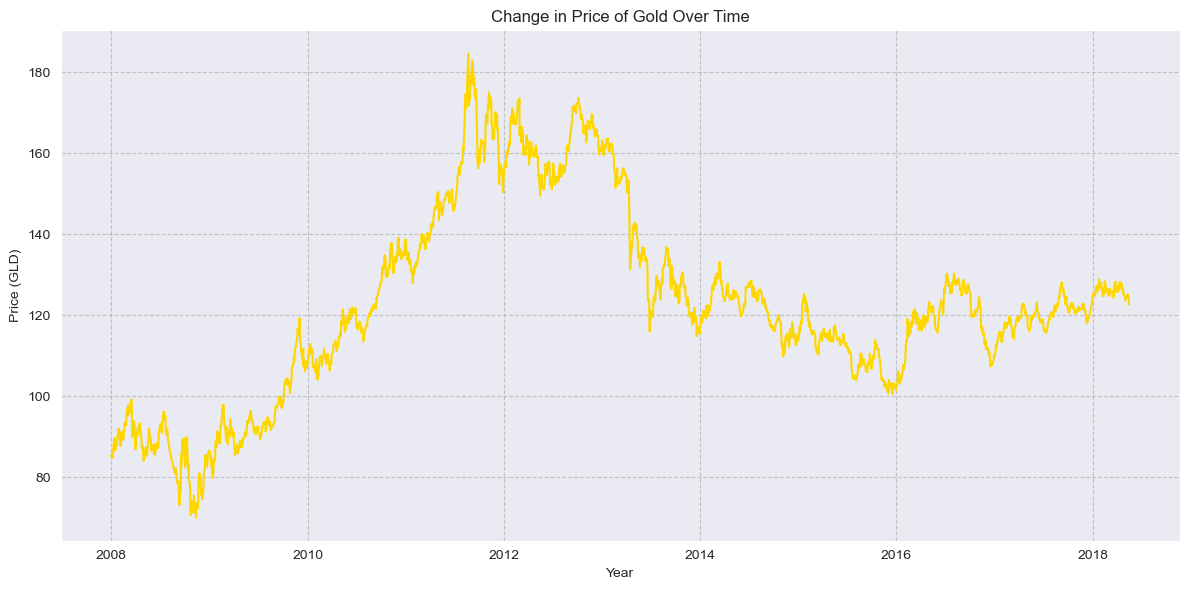

In [20]:
# Ensure date is converted properly
Gold_dataset['Date'] = pd.to_datetime(Gold_dataset['Date'], errors='coerce')

# Plot gold price against actual dates
plt.figure(figsize=(12,6))
plt.plot(Gold_dataset['Date'], Gold_dataset['GLD'], color='gold')

plt.title("Change in Price of Gold Over Time")
plt.xlabel("Year")
plt.ylabel("Price (GLD)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Linear Regression Evaluation Metrics
MAE  : 5.8742
RMSE : 7.1594
R²   : -1.1873
MAPE : 4.86%

Lasso Regression Evaluation Metrics
MAE  : 5.8598
RMSE : 7.1434
R²   : -1.1776
MAPE : 4.85%



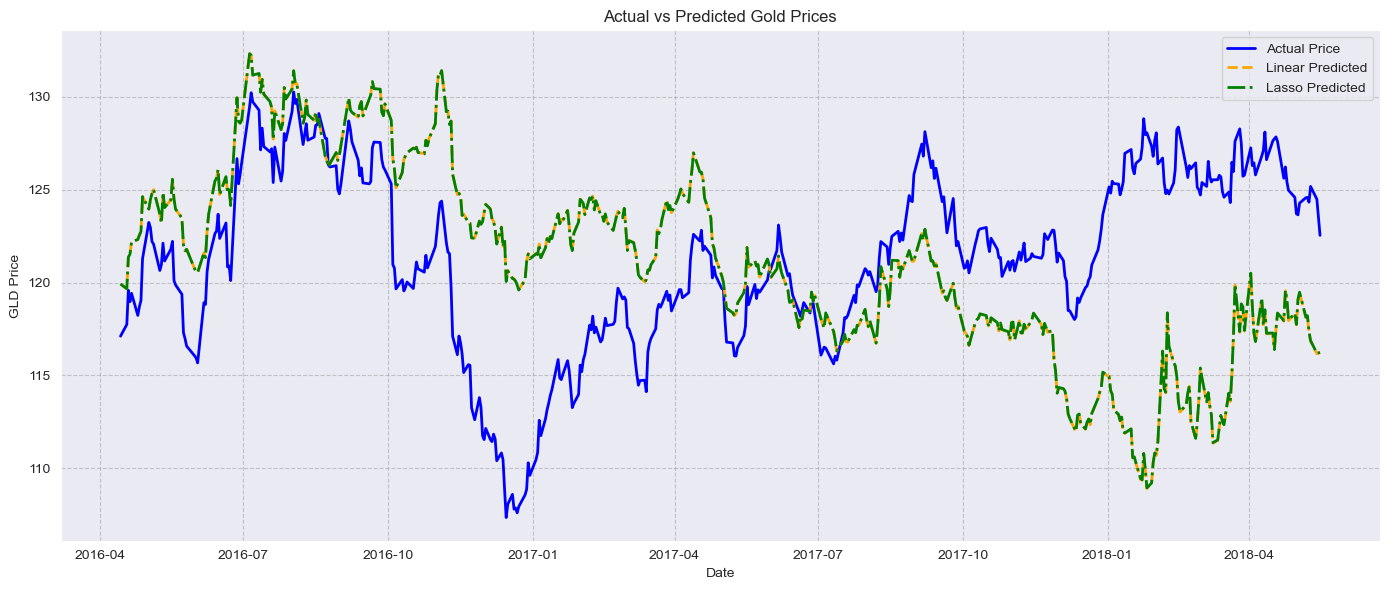

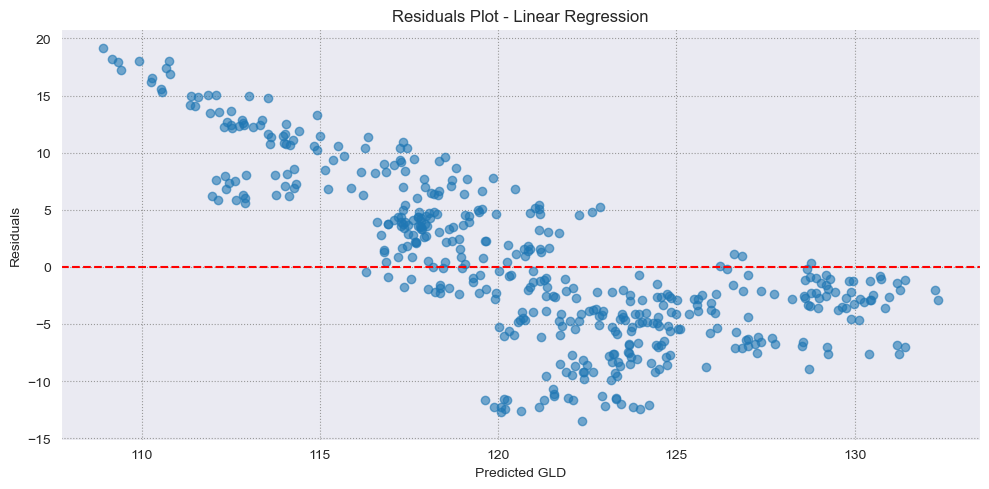

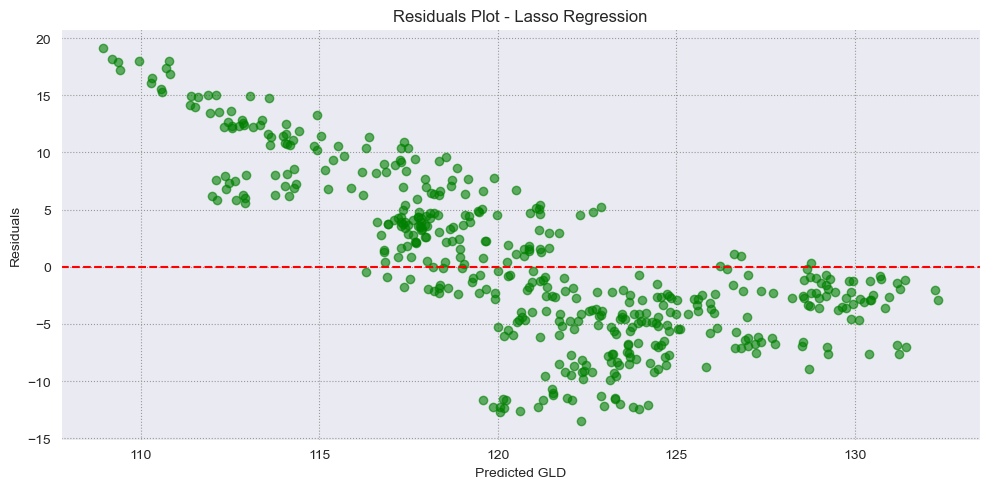

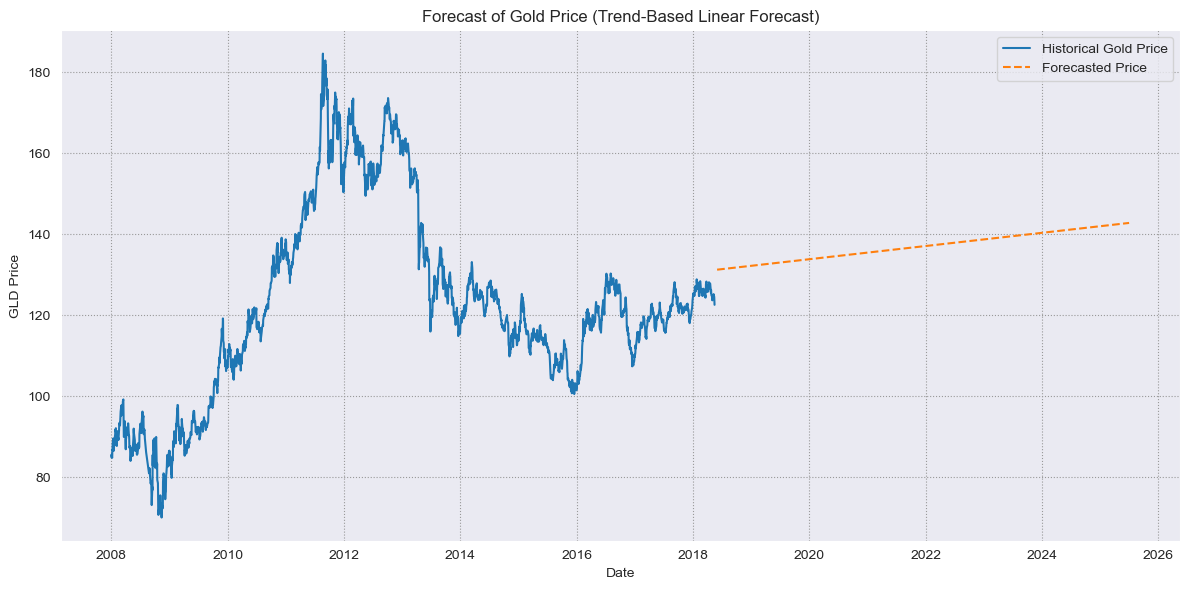

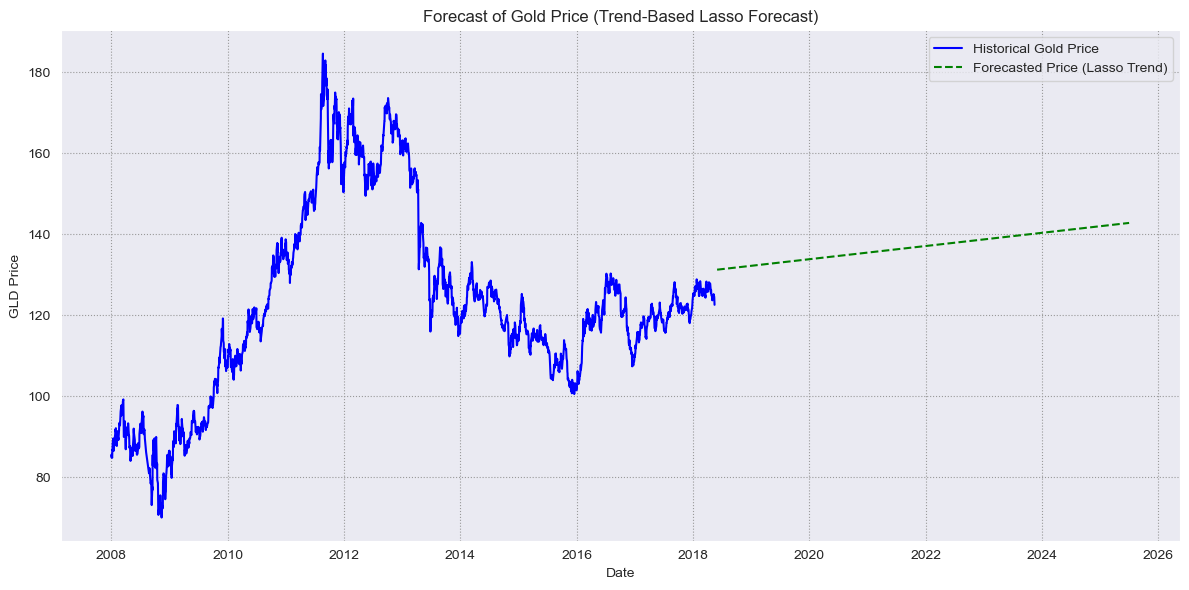

In [21]:
import datetime      
# ==============================
# Linear Regression
# ==============================
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

# Convert 'Date' to ordinal for trend-based modeling
Gold_dataset['Date_ordinal'] = Gold_dataset['Date'].map(datetime.datetime.toordinal)

# Define features and target
X = Gold_dataset.drop(columns=['Date', 'GLD'])
y = Gold_dataset['GLD']

# Train-test split (80% train, 20% test)
split_idx = int(len(Gold_dataset) * 0.8)
X_train, X_test = X.iloc[:split_idx], X.iloc[split_idx:]
y_train, y_test = y.iloc[:split_idx], y.iloc[split_idx:]

# ==============================
# Train Models
# ==============================
# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

# Lasso Regression
lasso_model = Lasso(alpha=0.001)
lasso_model.fit(X_train, y_train)
lasso_pred = lasso_model.predict(X_test)

# ==============================
# Evaluation Metrics
# ==============================
def evaluate_and_print(y_true, y_pred, model_name):
    mae  = mean_absolute_error(y_true, y_pred)
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    r2   = r2_score(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred) * 100  
    
    print(f"{model_name} Evaluation Metrics")
    print(f"MAE  : {mae:.4f}")
    print(f"RMSE : {rmse:.4f}")
    print(f"R²   : {r2:.4f}")
    print(f"MAPE : {mape:.2f}%\n")

evaluate_and_print(y_test, lr_pred,    "Linear Regression")
evaluate_and_print(y_test, lasso_pred, "Lasso Regression")

# ==============================
# Actual vs Predicted Plot
# ==============================
plt.figure(figsize=(14, 6))
plt.plot(Gold_dataset['Date'].iloc[split_idx:], y_test.values, label='Actual Price', color='blue', linewidth=2)
plt.plot(Gold_dataset['Date'].iloc[split_idx:], lr_pred, label='Linear Predicted', color='orange', linestyle='--', linewidth=2)
plt.plot(Gold_dataset['Date'].iloc[split_idx:], lasso_pred, label='Lasso Predicted', color='green', linestyle='-.', linewidth=2)

plt.title("Actual vs Predicted Gold Prices")
plt.xlabel("Date")
plt.ylabel("GLD Price")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


# ==============================
# Residuals Plot - Linear Regression
# ==============================
residuals = y_test - lr_pred
plt.figure(figsize=(10,5))
plt.scatter(lr_pred, residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals Plot - Linear Regression")
plt.xlabel("Predicted GLD")
plt.ylabel("Residuals")
plt.tight_layout()
plt.show()

# ==============================
# Residuals Plot - Lasso Regression
# ==============================
residuals_lasso = y_test - lasso_pred
plt.figure(figsize=(10,5))
plt.scatter(lasso_pred, residuals_lasso, alpha=0.6, color='green')
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals Plot - Lasso Regression")
plt.xlabel("Predicted GLD")
plt.ylabel("Residuals")
plt.tight_layout()
plt.show()

# ==============================
# Forecast Future Values
# ==============================
# Use time trend only (Date_ordinal)
trend_model = LinearRegression()
trend_model.fit(Gold_dataset[['Date_ordinal']], y)

# Generate future dates
future_dates = pd.date_range(Gold_dataset['Date'].iloc[-1] + pd.Timedelta(days=1), "2025-07-06", freq='MS')
future_ordinals = future_dates.map(datetime.datetime.toordinal).values.reshape(-1, 1)

# Predict future prices
future_preds = trend_model.predict(future_ordinals)

# ==============================
# Forecast Future Values – Lasso Trend
# ==============================
lasso_trend_model = Lasso(alpha=0.001)
lasso_trend_model.fit(Gold_dataset[['Date_ordinal']], y)

future_preds_lasso = lasso_trend_model.predict(future_ordinals)

# ==============================
# Plot Forecast
# ==============================
plt.figure(figsize=(12,6))
plt.plot(Gold_dataset['Date'], y, label="Historical Gold Price")
plt.plot(future_dates, future_preds, label="Forecasted Price", linestyle="--")
plt.title("Forecast of Gold Price (Trend-Based Linear Forecast)")
plt.xlabel("Date")
plt.ylabel("GLD Price")
plt.legend()
plt.tight_layout()
plt.show()

# ==============================
# Plot Forecast – Lasso Trend
# ==============================
plt.figure(figsize=(12,6))
plt.plot(Gold_dataset['Date'], y, label="Historical Gold Price", color='blue')
plt.plot(future_dates, future_preds_lasso,
         label="Forecasted Price (Lasso Trend)", linestyle="--", color='green')
plt.title("Forecast of Gold Price (Trend-Based Lasso Forecast)")
plt.xlabel("Date")
plt.ylabel("GLD Price")
plt.legend()
plt.tight_layout()
plt.show()




In [22]:
# ==============================================================
# Common helper (re-use from earlier cell)
# ==============================================================
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

def evaluate_and_print(y_true, y_pred, model_name):
    mae  = mean_absolute_error(y_true, y_pred)
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    r2   = r2_score(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred) * 100
    print(f"{model_name} Evaluation Metrics")
    print(f"MAE  : {mae:.4f}")
    print(f"RMSE : {rmse:.4f}")
    print(f"R²   : {r2:.4f}")
    print(f"MAPE : {mape:.2f}%\n")


RandomForest (lag)  →  MAE:0.82  RMSE:1.09  R²:0.950  MAPE:0.67%


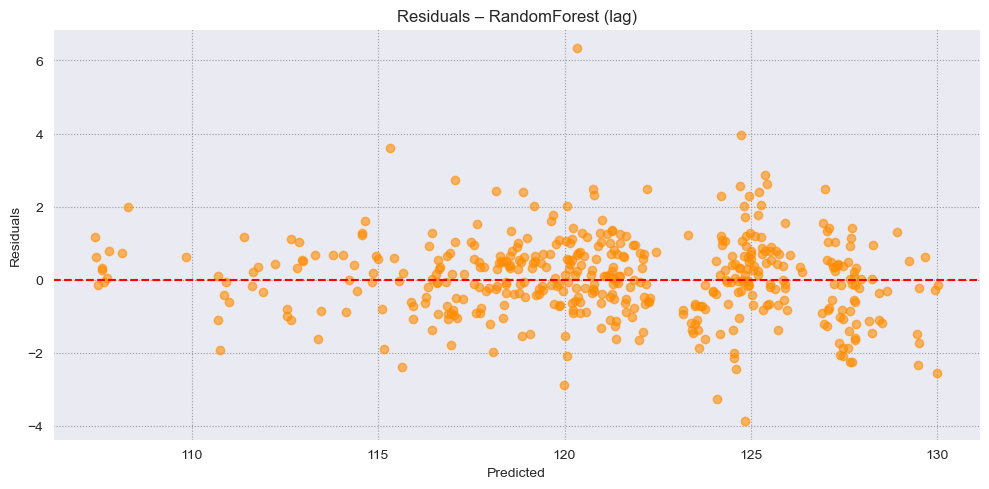

XGBoost (lag)  →  MAE:0.84  RMSE:1.12  R²:0.947  MAPE:0.69%


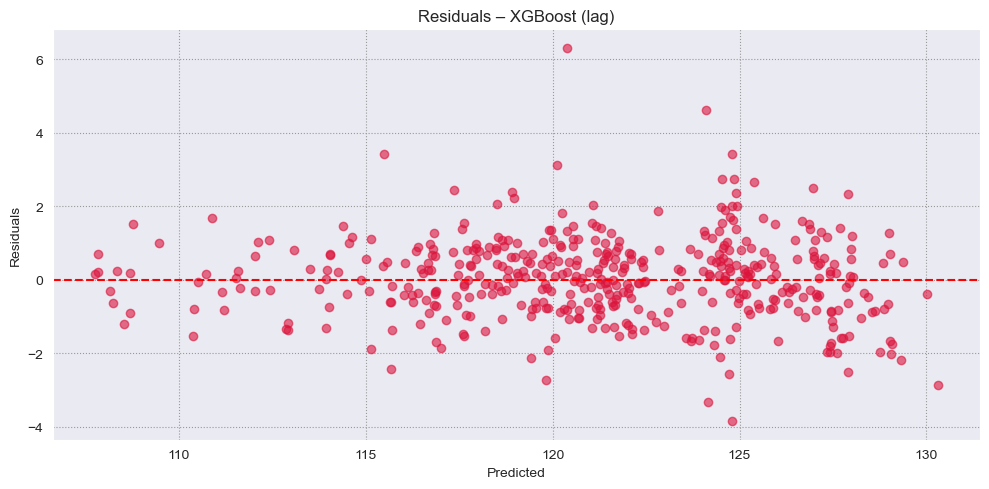

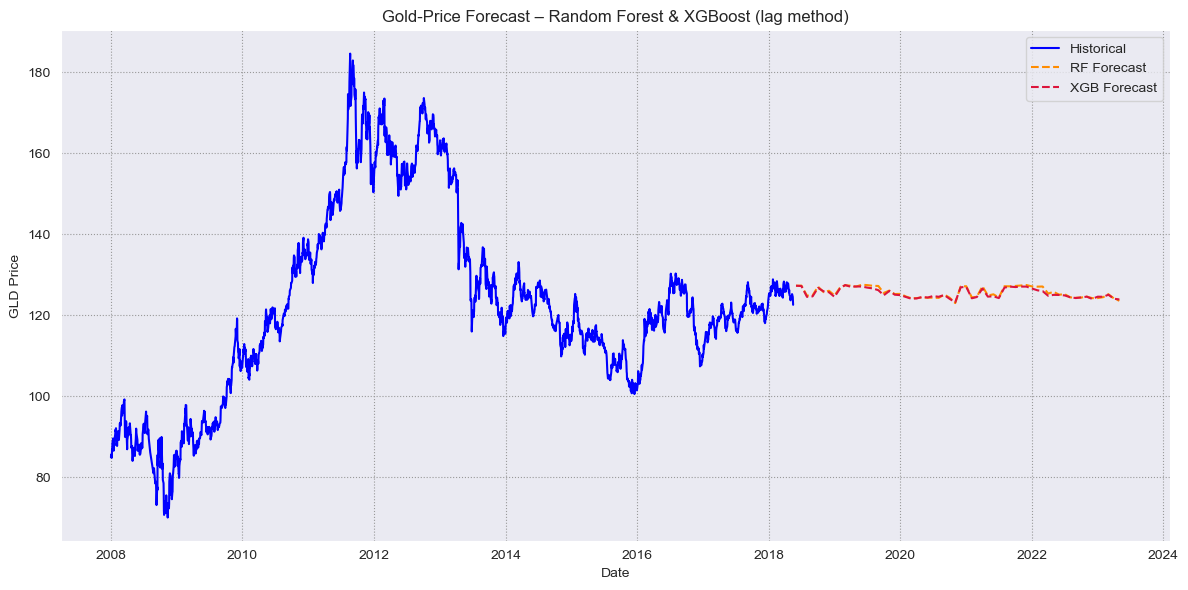

In [40]:
# ==============================================================
# Lag-based feature matrix
# ==============================================================

# --- parameters ---
n_lags      = 30          # use the past 30 trading days
forecast_h  = 60          # months to forecast(5 years)
future_freq = 'MS'        # Month-Start dates for the plot

# --- build lag features ---
Gold_dataset = Gold_dataset.sort_values('Date').reset_index(drop=True)
for lag in range(1, n_lags + 1):
    Gold_dataset[f'lag_{lag}'] = Gold_dataset['GLD'].shift(lag)

data_lagged = Gold_dataset.dropna().reset_index(drop=True)

X_lag = data_lagged.filter(like='lag_')
y_lag = data_lagged['GLD']

# --- train-test split (time-ordered) ---
split_idx_lag = int(len(data_lagged) * 0.8)
X_train_lag, X_test_lag = X_lag.iloc[:split_idx_lag], X_lag.iloc[split_idx_lag:]
y_train_lag, y_test_lag = y_lag.iloc[:split_idx_lag], y_lag.iloc[split_idx_lag:]

# shared helper
def eval_model(y_true, y_pred, name):
    mae  = mean_absolute_error(y_true, y_pred)
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    r2   = r2_score(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred) * 100
    print(f"{name}  →  MAE:{mae:.2f}  RMSE:{rmse:.2f}  R²:{r2:.3f}  MAPE:{mape:.2f}%")

# ==============================================================
# 1. Random Forest (lag features)
# ==============================================================
from sklearn.ensemble import RandomForestRegressor

rf_lag = RandomForestRegressor(
    n_estimators=500, max_depth=None, random_state=42, n_jobs=-1)
rf_lag.fit(X_train_lag, y_train_lag)
rf_pred = rf_lag.predict(X_test_lag)

eval_model(y_test_lag, rf_pred, "RandomForest (lag)")

# ------- residual plot -------
plt.figure(figsize=(10,5))
plt.scatter(rf_pred, y_test_lag - rf_pred, alpha=0.6, color='darkorange')
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals – RandomForest (lag)"); plt.xlabel("Predicted"); plt.ylabel("Residuals")
plt.tight_layout(); plt.show()

# ==============================================================
# 2. XGBoost (lag features)
# ==============================================================
from xgboost import XGBRegressor

xgb_lag = XGBRegressor(
    n_estimators=900, learning_rate=0.03,
    max_depth=6, subsample=0.8, colsample_bytree=0.8,
    objective='reg:squarederror', random_state=42, n_jobs=-1)
xgb_lag.fit(X_train_lag, y_train_lag)
xgb_pred = xgb_lag.predict(X_test_lag)

eval_model(y_test_lag, xgb_pred, "XGBoost (lag)")

# ------- residual plot -------
plt.figure(figsize=(10,5))
plt.scatter(xgb_pred, y_test_lag - xgb_pred, alpha=0.6, color='crimson')
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals – XGBoost (lag)"); plt.xlabel("Predicted"); plt.ylabel("Residuals")
plt.tight_layout(); plt.show()

# ==============================================================
# 3. Recursive multi-step forecast 
# ==============================================================

# start window = last n_lags actual GLD values
last_window = Gold_dataset['GLD'].iloc[-n_lags:].values.tolist()

rf_future, xgb_future = [], []
future_dates = pd.date_range(
    start=Gold_dataset['Date'].iloc[-1] + pd.offsets.MonthBegin(),
    periods=forecast_h,
    freq=future_freq)

for _ in range(forecast_h):
    X_next = np.array(last_window[-n_lags:]).reshape(1, -1)

    rf_next  = rf_lag.predict(X_next)[0]
    xgb_next = xgb_lag.predict(X_next)[0]

    rf_future.append(rf_next)
    xgb_future.append(xgb_next)

    # update window with **RF** prediction for next step
    last_window.append(rf_next)        

# ==============================================================
# 4. Plot forecasts
# ==============================================================

plt.figure(figsize=(12,6))
plt.plot(Gold_dataset['Date'], Gold_dataset['GLD'],
         label='Historical', color='blue')
plt.plot(future_dates, rf_future,  '--', label='RF Forecast',  color='darkorange')
plt.plot(future_dates, xgb_future, '--', label='XGB Forecast', color='crimson')
plt.title("Gold-Price Forecast – Random Forest & XGBoost (lag method)")
plt.xlabel("Date"); plt.ylabel("GLD Price"); plt.legend(); plt.tight_layout(); plt.show()


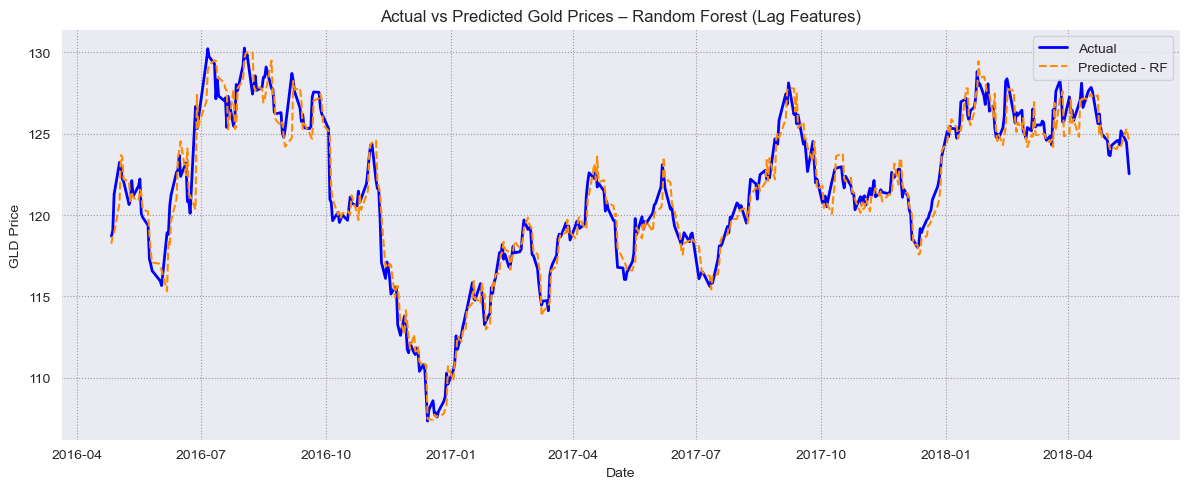

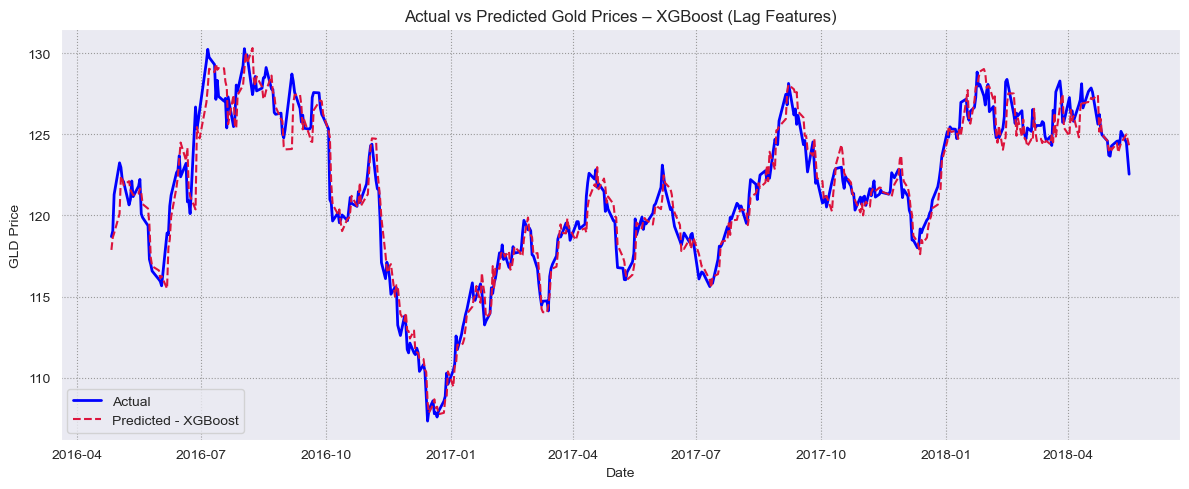

In [25]:
# Extract corresponding dates for the test set
test_dates = data_lagged['Date'].iloc[split_idx_lag:].values

# ==============================================================
# Actual vs Predicted Plot – Random Forest (with Date)
# ==============================================================

plt.figure(figsize=(12, 5))
plt.plot(test_dates, y_test_lag.values, label="Actual", color="blue", linewidth=2)
plt.plot(test_dates, rf_pred, label="Predicted - RF", color="darkorange", linestyle="--")
plt.title("Actual vs Predicted Gold Prices – Random Forest (Lag Features)")
plt.xlabel("Date")
plt.ylabel("GLD Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# ==============================================================
# Actual vs Predicted Plot – XGBoost (with Date)
# ==============================================================

plt.figure(figsize=(12, 5))
plt.plot(test_dates, y_test_lag.values, label="Actual", color="blue", linewidth=2)
plt.plot(test_dates, xgb_pred, label="Predicted - XGBoost", color="crimson", linestyle="--")
plt.title("Actual vs Predicted Gold Prices – XGBoost (Lag Features)")
plt.xlabel("Date")
plt.ylabel("GLD Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Best LSTM → window:30  units:128  val_loss:0.0002
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step
Tuned LSTM  →  MAE:1.34  RMSE:1.67  R²:0.882  MAPE:1.11%


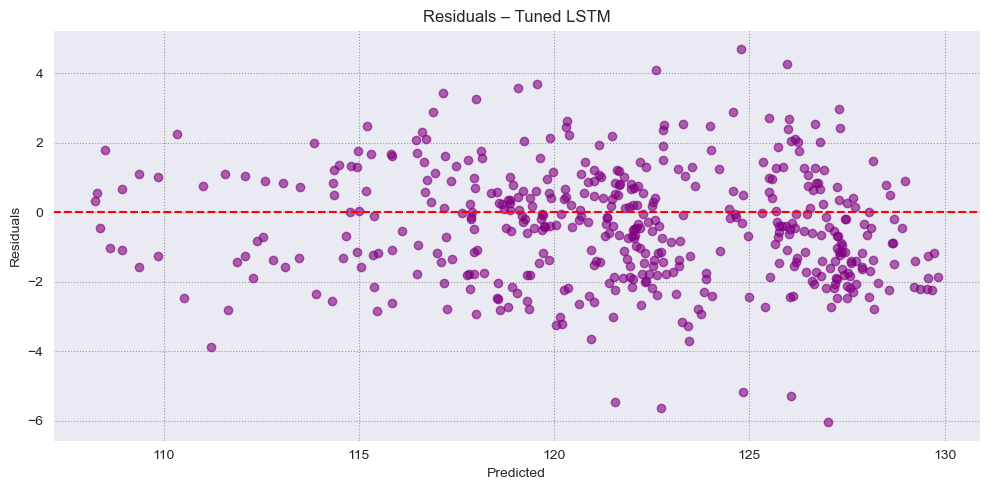

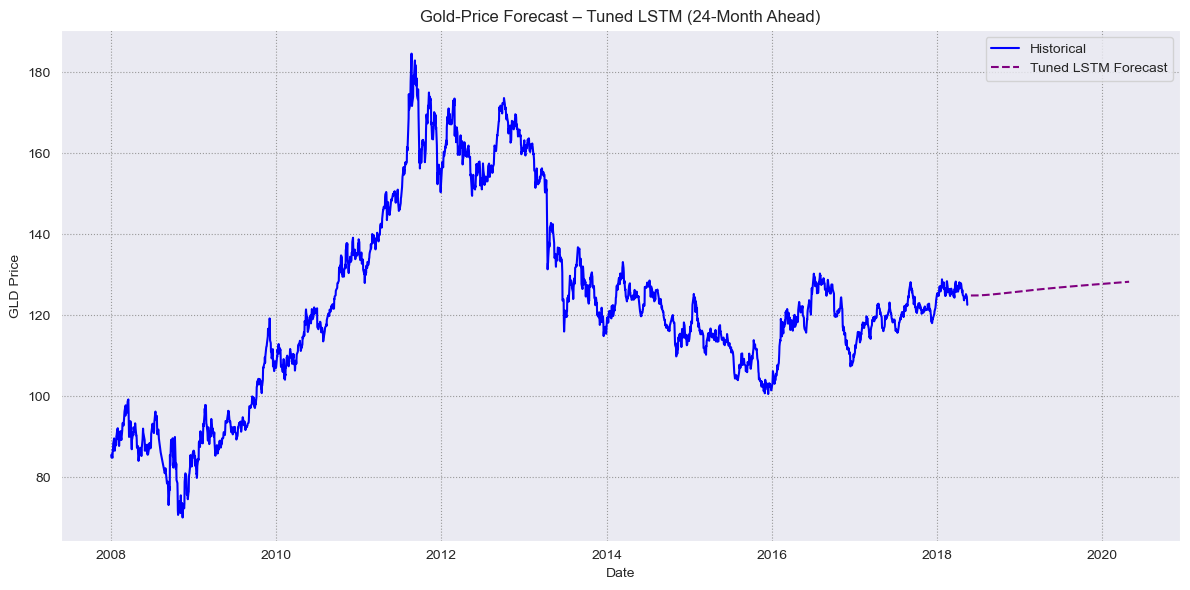

In [26]:
# ==============================================================
# LSTM (lag features) – tuned & 24-month recursive forecast
# ==============================================================

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.preprocessing import MinMaxScaler
import numpy as np, matplotlib.pyplot as plt

# ----- hyper-parameter grid -----
look_backs   = [30, 60, 90]          # candidate windows
unit_options = [32, 64, 128]         # hidden widths
BATCH_SIZE   = 32
EPOCHS       = 120
PATIENCE     = 10                    # early stopping

# ----- scale target -----
scaler = MinMaxScaler()
gl_scaled = scaler.fit_transform(Gold_dataset['GLD'].values.reshape(-1, 1))

def make_sequences(series, lb):
    X, y = [], []
    for i in range(lb, len(series)):
        X.append(series[i-lb:i, 0])
        y.append(series[i, 0])
    return np.array(X), np.array(y)

best_val   = np.inf
best_conf  = None
best_model = None
best_lb    = None

# ----- grid search -----
for lb in look_backs:
    X_all, y_all = make_sequences(gl_scaled, lb)
    split = int(len(X_all)*0.8)
    X_train, y_train = X_all[:split], y_all[:split]
    X_val,   y_val   = X_all[split:], y_all[split:]
    X_train = X_train[..., np.newaxis]
    X_val   = X_val[...,   np.newaxis]

    for units in unit_options:
        model = Sequential([
            LSTM(units, return_sequences=True, input_shape=(lb,1)),
            Dropout(0.2),
            LSTM(units//2),
            Dense(1)
        ])
        model.compile(optimizer='adam', loss='mse')

        es  = EarlyStopping(patience=PATIENCE, restore_best_weights=True)
        rlr = ReduceLROnPlateau(patience=PATIENCE//2, factor=0.5, min_lr=1e-5)

        hist = model.fit(
            X_train, y_train,
            validation_data=(X_val, y_val),
            epochs=EPOCHS, batch_size=BATCH_SIZE,
            callbacks=[es, rlr], verbose=0
        )
        val_loss = min(hist.history['val_loss'])
        if val_loss < best_val:
            best_val, best_conf = val_loss, (lb, units)
            best_model, best_lb = model, lb

print(f"Best LSTM → window:{best_conf[0]}  units:{best_conf[1]}  val_loss:{best_val:.4f}")

# ----- re-train on full 80 % train set -----
X_full, y_full = make_sequences(gl_scaled, best_lb)
split_full = int(len(X_full)*0.8)
X_tr, y_tr = X_full[:split_full], y_full[:split_full]
X_ts, y_ts = X_full[split_full:], y_full[split_full:]
X_tr = X_tr[..., np.newaxis];  X_ts = X_ts[..., np.newaxis]

es_final = EarlyStopping(patience=PATIENCE, restore_best_weights=True)
best_model.fit(
    X_tr, y_tr,
    epochs=EPOCHS, batch_size=BATCH_SIZE,
    validation_split=0.05,
    callbacks=[es_final], verbose=0
)

# ----- evaluation on hold-out -----
pred_scaled = best_model.predict(X_ts).ravel()
pred_actual = scaler.inverse_transform(pred_scaled.reshape(-1,1)).ravel()
y_ts_actual = scaler.inverse_transform(y_ts.reshape(-1,1)).ravel()

eval_model(y_ts_actual, pred_actual, "Tuned LSTM")

# ----- residual plot -----
plt.figure(figsize=(10,5))
plt.scatter(pred_actual, y_ts_actual - pred_actual, alpha=0.6, color='purple')
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals – Tuned LSTM"); plt.xlabel("Predicted"); plt.ylabel("Residuals")
plt.tight_layout(); plt.show()

# ===============================================
# Recursive 24-month forecast with tuned LSTM
# ===============================================

forecast_steps = 24
window = gl_scaled[-best_lb:].copy()
future_pred_scaled = []

for _ in range(forecast_steps):
    x_next = window.reshape(1, best_lb, 1)
    y_next = best_model.predict(x_next, verbose=0)[0,0]
    future_pred_scaled.append(y_next)
    window = np.append(window[1:], [[y_next]], axis=0)

future_pred = scaler.inverse_transform(np.array(future_pred_scaled).reshape(-1,1)).ravel()
future_dates = pd.date_range(
    start=Gold_dataset['Date'].iloc[-1] + pd.offsets.MonthBegin(),
    periods=forecast_steps,
    freq='MS'
)

# ----- plot -----
plt.figure(figsize=(12,6))
plt.plot(Gold_dataset['Date'], Gold_dataset['GLD'], label='Historical', color='blue')
plt.plot(future_dates, future_pred, '--', color='purple', label='Tuned LSTM Forecast')
plt.title("Gold-Price Forecast – Tuned LSTM (24-Month Ahead)")
plt.xlabel("Date"); plt.ylabel("GLD Price"); plt.legend(); plt.tight_layout(); plt.show()


In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# ===============================================================
# LSTM - Time Series Cross Validation
# ===============================================================

scaler = MinMaxScaler()
gl_scaled = scaler.fit_transform(Gold_dataset['GLD'].values.reshape(-1, 1))

# ===============================================================
# Sequence creator
# ===============================================================
def make_sequences(series, lb):
    X, y = [], []
    for i in range(lb, len(series)):
        X.append(series[i - lb:i, 0])
        y.append(series[i, 0])
    return np.array(X), np.array(y)

# Set parameters
look_back = 60  
units = 64      
BATCH_SIZE = 32
EPOCHS = 50
PATIENCE = 5

# ===============================================================
# Step 3: Prepare sequences and reshape for LSTM
# ===============================================================
X_seq, y_seq = make_sequences(gl_scaled, look_back)
X_seq = X_seq[..., np.newaxis]  # shape becomes (samples, look_back, 1)

# ===============================================================
# Step 4: Time Series Cross-Validation
# ===============================================================
tscv = TimeSeriesSplit(n_splits=5)

mse_scores, rmse_scores, mae_scores, r2_scores, mape_scores = [], [], [], [], []

for fold, (train_idx, test_idx) in enumerate(tscv.split(X_seq), 1):
    X_train, X_test = X_seq[train_idx], X_seq[test_idx]
    y_train, y_test = y_seq[train_idx], y_seq[test_idx]

    # Model definition
    model = Sequential([
        LSTM(units, return_sequences=True, input_shape=(look_back, 1)),
        Dropout(0.2),
        LSTM(units // 2),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')

    # Callbacks
    es = EarlyStopping(patience=PATIENCE, restore_best_weights=True)
    rlr = ReduceLROnPlateau(patience=3, factor=0.5, min_lr=1e-5)

    # Train model
    model.fit(
        X_train, y_train,
        validation_data=(X_test, y_test),
        epochs=EPOCHS,
        batch_size=BATCH_SIZE,
        callbacks=[es, rlr],
        verbose=0
    )

    # Predict and inverse scale
    y_pred_scaled = model.predict(X_test).ravel()
    y_pred = scaler.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()
    y_true = scaler.inverse_transform(y_test.reshape(-1, 1)).ravel()

    # Metrics
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred) * 100

    # Store
    mse_scores.append(mse)
    rmse_scores.append(rmse)
    mae_scores.append(mae)
    r2_scores.append(r2)
    mape_scores.append(mape)

    print(f"Fold {fold} → RMSE: {rmse:.2f}, MAE: {mae:.2f}, R²: {r2:.4f}, MAPE: {mape:.2f}%")

# ===============================================================
# Step 5: Final Summary
# ===============================================================
print("\n===== LSTM Cross-Validation Summary =====")
print(f"Avg RMSE  : {np.mean(rmse_scores):.4f}")
print(f"Avg MAE   : {np.mean(mae_scores):.4f}")
print(f"Avg R²    : {np.mean(r2_scores):.4f}")
print(f"Avg MAPE  : {np.mean(mape_scores):.2f}%")


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step
Fold 1 → RMSE: 2.99, MAE: 2.32, R²: 0.9706, MAPE: 1.77%
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step
Fold 2 → RMSE: 4.83, MAE: 3.48, R²: 0.6067, MAPE: 2.20%
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step
Fold 3 → RMSE: 3.26, MAE: 2.55, R²: 0.7199, MAPE: 2.06%
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step
Fold 4 → RMSE: 2.43, MAE: 1.89, R²: 0.8998, MAPE: 1.65%
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step
Fold 5 → RMSE: 2.11, MAE: 1.71, R²: 0.8050, MAPE: 1.43%

===== LSTM Cross-Validation Summary =====
Avg RMSE  : 3.1245
Avg MAE   : 2.3933
Avg R²    : 0.8004
Avg MAPE  : 1.82%


In [41]:
import pandas as pd

# Create a table of the 24‑month forecasts
forecast_df = pd.DataFrame({
    'Date': future_dates,
    'RandomForest_Forecast': rf_future,
    'XGBoost_Forecast': xgb_future
})

# Display the forecast table
print("\n24‑Month Forecast Table:")
print(forecast_df.to_string(index=False))



24‑Month Forecast Table:
      Date  RandomForest_Forecast  XGBoost_Forecast
2018-06-01             127.249399        127.263229
2018-07-01             127.287379        127.175934
2018-08-01             124.804259        124.504944
2018-09-01             124.864759        124.625656
2018-10-01             127.034779        126.726402
2018-11-01             125.679059        125.869362
2018-12-01             126.008799        125.645561
2019-01-01             124.852939        124.495506
2019-02-01             126.842899        126.626862
2019-03-01             127.360199        127.424095
2019-04-01             127.273439        126.981422
2019-05-01             127.040059        127.073433
2019-06-01             127.491239        127.059608
2019-07-01             127.414059        126.792793
2019-08-01             127.238159        126.590118
2019-09-01             127.195199        126.153427
2019-10-01             125.468779        124.897583
2019-11-01             126.059820     

In [37]:
#| Model             | RMSE | MAE  | R²    | MAPE  |
#| ----------------- | ---- | ---- | ----- | ----- |
#| **Linear**        | 7.15 | 5.87 | -1.18 | 4.86% |
#| **Lasso**         | 7.14 | 5.86 | -1.17 | 4.85% |
#| **Random Forest** | 1.09 | 0.82 | 0.95  | 0.67% |
#| **XGBoost**       | 1.12 | 0.84 | 0.947 | 0.69% |
#| **Tuned LSTM**    | 1.67 | 1.34 | 0.88  | 1.11% |
#| **LSTM CV Avg**   | 3.12 | 2.39 | 0.80  | 1.82% |

# Best performance came from tree-based models (Random Forest, XGBoost).

# LSTM is powerful but needs careful tuning and lots of data.

# Linear/Lasso models underperformed due to their simplicity.

# Feature engineering (lag creation) and recursive forecasting are crucial for time series.